# Part 0.0: Import of libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from statistics import mean 
import os
import csv
print(cv2.__version__)

4.5.1


# Part 0.1: Preparation of important paths, lists and variables

In [22]:
# importing self-written functions from droplet_func.py
from droplet_func import fill_droplets, make_contours, make_ellipse, show_image, export_data, \
    import_data, plot_boxplot, aspect_ratio_histogram, mean_over_position, mean_radius_histogram, \
    droplet_recognition_test

In the following cell we set the image path. Note that this corresponds to images taken at different pressure settings. The folder path with name -0.4 corresponds to 0.6 bar

In [4]:
IMAGE_PATH = "../-0.4/"
OUTPUT_PATH = "./output/"

Next, we import all the folders at the given image path. Then the amount of imported folders is printed to check whether the import is complete. The value should be 10 for the pressure value 0.6 bar. Each of these 10 folders corresponds to a different distance position from the nozzle. In later cells you can specify which folder you exactly want to look at. If you want to consider less of these 'distance folders' please change the variable "number_of_folders" to the number of folders you want to consider + 1. 

In [5]:
# importing the folders in the given image path
all_filenames = []
number_of_folders = 11
for folder_id in range(1, number_of_folders):
    all_filenames.append(os.listdir(IMAGE_PATH+str(folder_id)+'/'))
    

In [6]:
# printing the amount of folders imported
print(f"Found Folders: {len(all_filenames)}")

Found Folders: 10


Example image from specific folder 

In [7]:
# notice that this is the first image of the third folder
folder_number = 3
image_number = 1

path = all_filenames[folder_number-1]
# print the name of a specific image
print(path[image_number-1])

img = cv2.imread(IMAGE_PATH+str(folder_number)+'/'+str(path[image_number-1]), cv2.IMREAD_COLOR)
cv2.imshow('image',img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

# in order to completely execute the cell, please close the opened image

Basler acA2000-165um (21743771)_20181209_101130199_0001.tiff


Chose specific folder(s) and images you want to consider. The folder corresponds to a certain distance from the nozzle. The higher the number of the folder, the further the distance. Notice: in order to consider the third folder, set folder_number_min = 3 and folder_number_max = 4. To consider the first image of a folder, set image_number_min = 1 and image_number_max = 2. In addition, note that the folders represent different positions to the nozzle. 

In [8]:
# Choice of yours
folder_number_min = 1
folder_number_max = 5
image_number_min = 1
image_number_max = 2

In [27]:
# the camera positions in regard to the nozzle i.e. the positions of the different folders. 
# the value are in mm.  
z_positions = [4, 7, 9, 12, 14, 20, 40, 60, 80, 100]

 # Part 0.2: First check if droplets are recognized

In [29]:
droplet_recognition_test(folder_number_min = folder_number_min, folder_number_max = folder_number_max, 
                         image_number_min = image_number_min, image_number_max = image_number_max, 
                         all_filenames = all_filenames, input_path = IMAGE_PATH, 
                         output_path = OUTPUT_PATH, saving = False)

Basler acA2000-165um (21743771)_20181209_100505940_0001.tiff
Basler acA2000-165um (21743771)_20181209_100847558_0001.tiff
Basler acA2000-165um (21743771)_20181209_101130199_0001.tiff
Basler acA2000-165um (21743771)_20181209_101342522_0001.tiff
skipped images: 0
Considered Droplets in total: 155


# Part 1: Aspect ratio calculation of the droplets

Skipped images in total: 0
Mean AR_per folder: [1.2662302571019917, 1.187092842392816, 1.167926418390796, 1.199019152937383]
Standard Deviation: [0.12522324665930035, 0.081605562584678, 0.11929942317310262, 0.08861868749645847]
Considered Droplets in total: 155


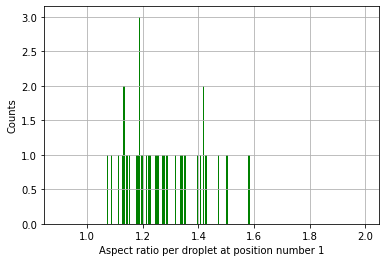

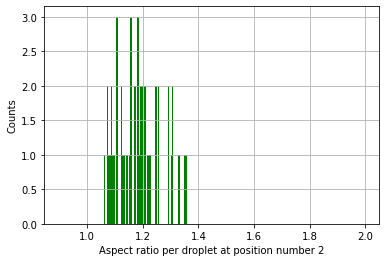

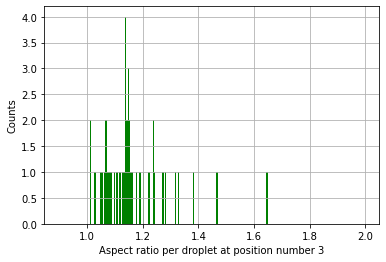

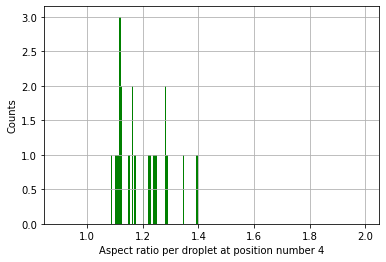

In [31]:
all_ar, mean_ar = aspect_ratio_histogram(folder_number_min = folder_number_min, 
                                         folder_number_max = folder_number_max, image_number_min = image_number_min,
                                         image_number_max = image_number_max, all_filenames = all_filenames, 
                                         input_path = IMAGE_PATH, output_path = OUTPUT_PATH, saving=False)
    

In [32]:
export_data(data = all_ar, folder_number_min = folder_number_min, folder_number_max = folder_number_max, 
            name = "aspect ratio", path = OUTPUT_PATH)

In [33]:
# only necessary if you did not newly generate the data in the cells above 
data_imported_ar = import_data(path_name = OUTPUT_PATH + 'data for aspect ratio.csv', 
                               folder_number_min = folder_number_min, folder_number_max = folder_number_max)


Plotting of the aspect ratio data for the droplets considered in the chosen folder(s) and image(s)

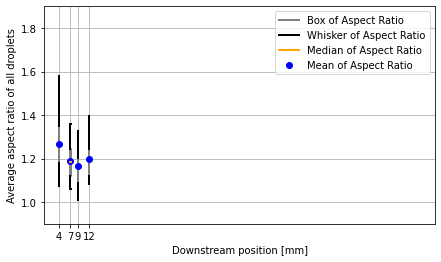

In [35]:
plot_boxplot(folder_number_min = folder_number_min, folder_number_max = folder_number_max, 
             z_positions = z_positions, data = data_imported_ar, mean = mean_ar, data_choice = "aspect ratio", 
             path = OUTPUT_PATH, saving=True)

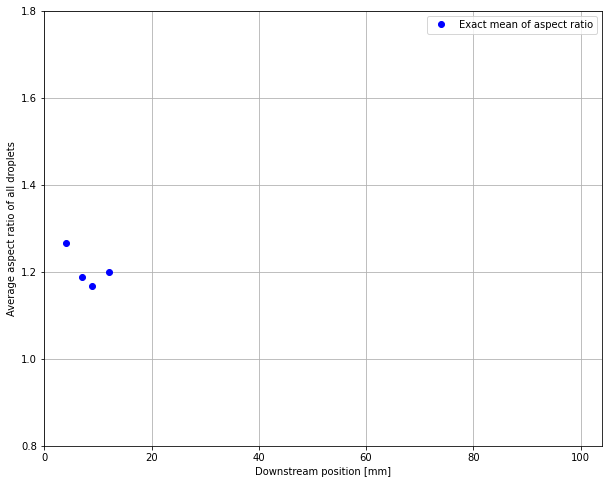

In [36]:
mean_over_position(folder_number_min = folder_number_min, folder_number_max = folder_number_max, 
                   z_positions = z_positions, mean_data = mean_ar, data_choice = "aspect ratio", 
                   path = OUTPUT_PATH, saving = False)

# Part 2: Mean radius calculation of the droplets

Mean radius averaged per folder [7.850245294741222, 8.479315322272631, 8.379059597651164, 7.619472988752218]
Standard Deviation each folder [1.4020887723198185, 1.1574861772146636, 1.4854179623222499, 1.7438894361196193]
skipped images in total: 0
Droplets considered in total: 155


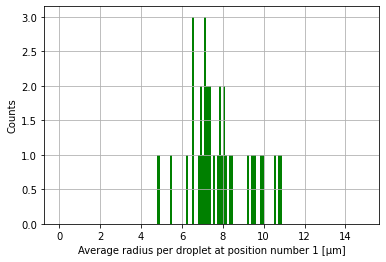

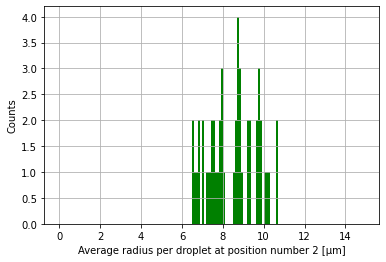

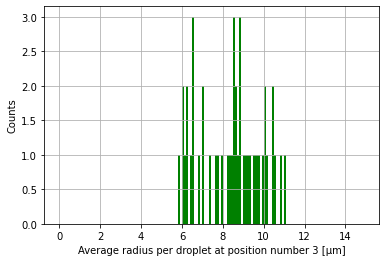

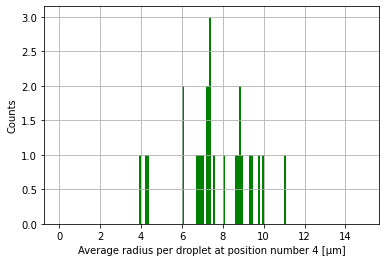

In [37]:
all_mr, mean_mr = mean_radius_histogram(folder_number_min = folder_number_min, folder_number_max = folder_number_max, 
                                        image_number_min = image_number_min, image_number_max = image_number_max, 
                                        all_filenames = all_filenames, input_path = IMAGE_PATH, 
                                        output_path = OUTPUT_PATH, saving=False)

In [17]:
export_data(data = all_mr, folder_number_min = folder_number_min, folder_number_max = folder_number_max,
            name = "average radius", path = OUTPUT_PATH)

In [38]:
# only necessary if you did not newly generate the data in the cells above 
data_imported_mr = import_data(path_name = OUTPUT_PATH + 'data for average radius.csv', 
                               folder_number_min = folder_number_min, folder_number_max = folder_number_max)

Plotting the average radius data for the droplets considered in the chosen folder(s) and image(s)

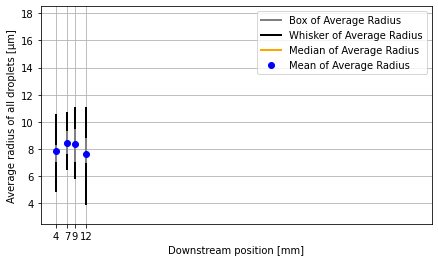

In [39]:
plot_boxplot(folder_number_min = folder_number_min, folder_number_max = folder_number_max, 
             z_positions = z_positions, data = data_imported_mr, mean = mean_mr, data_choice = "average radius", 
             path = OUTPUT_PATH, saving=False)

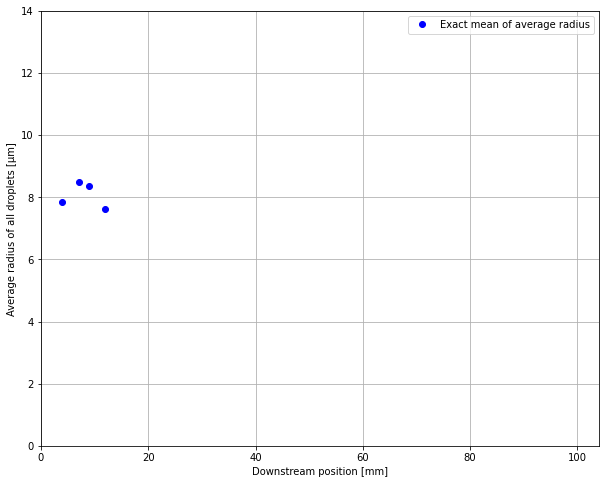

In [40]:
mean_over_position(folder_number_min = folder_number_min, folder_number_max = folder_number_max, 
                   z_positions = z_positions, mean_data = mean_mr, data_choice = "average radius", 
                   path = OUTPUT_PATH, saving = False)